In [3]:
import os
# change to the root directory of the project
while os.getcwd().split('/')[-1] != 'spectral-properties-of-NN':
    os.chdir('..')
print(os.getcwd())

/home/nadezhda/Desktop/SEMESTER PROJECT/spectral-properties-of-NN


In [4]:
# arguments
import yaml
from omegaconf import OmegaConf
import torch
import numpy as np
import matplotlib.pyplot as plt
# custom imports
from src.utils.plot_utils import plot_groundtruth_and_lanczos
from src.utils.general_utils import count_correctly_estimated_eigenvalues

<div class="alert alert-block alert-success">
  ❓ <strong> Question: </strong> 

   How does the spectrum obtained from the Lanczos algorithm compare to the true spectrum?

</div>

# Experiment 01: Neural Network - Layers: [784, 16, 10]

## 1. Dataset: MNIST

### 1.1. Untrained Model

Results directory: experiments/01_NN_MNIST/results/untrained/slow


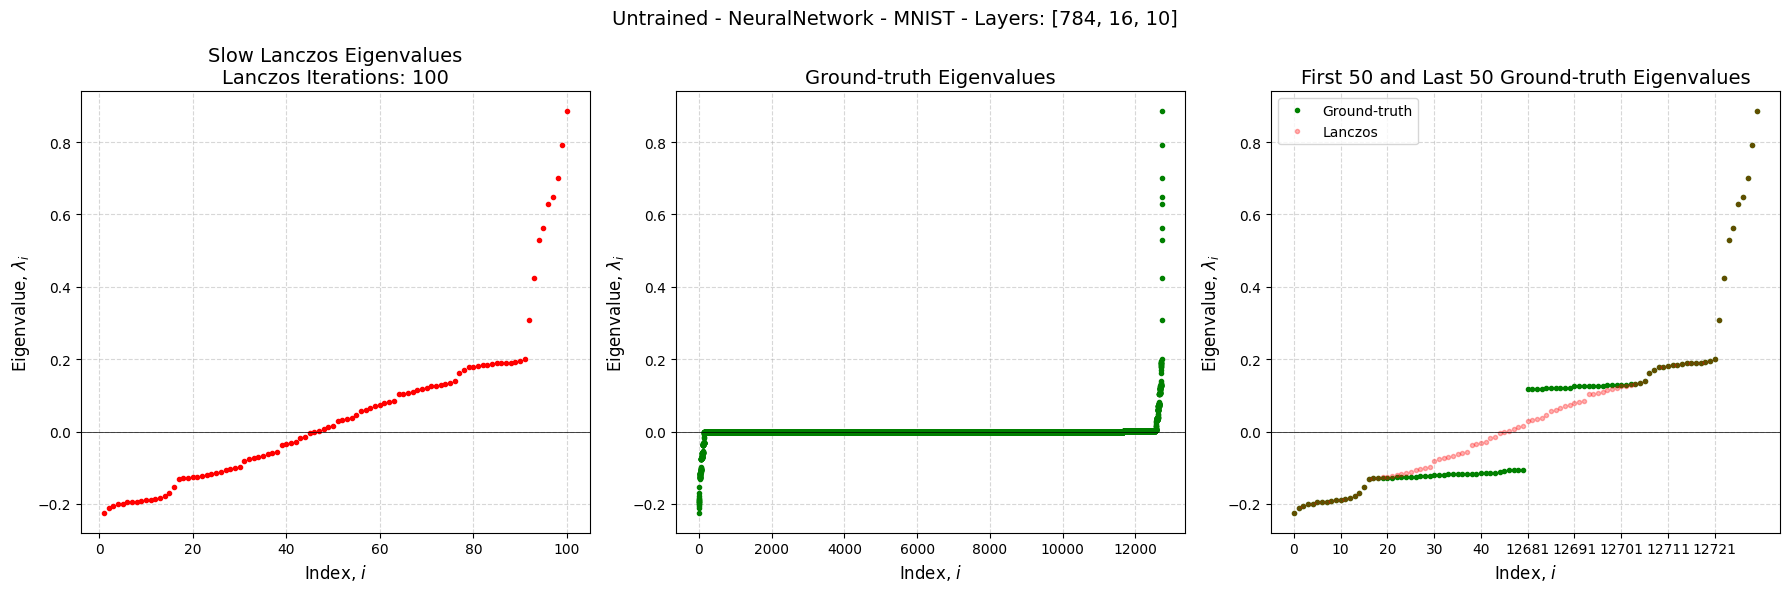

Correctly estimated eigenvalues: 41


In [5]:
EXPERIMENT = "01_NN_MNIST"
MODEL = "untrained"
LANCZOS = "slow"
HBS = 60000 # full Hessian batch size
ITER = 100

# get the results directory path
results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
print(f"Results directory: {results_dir}")

# load "groundtruth" eigenvalues
gt_eigenvalues = torch.load(f"experiments/{EXPERIMENT}/groundtruth/model_{MODEL}/eigenvalues.pt")

# load the computed eigenvalues
lanczos_eigenvalues = torch.load(os.path.join(results_dir, f"HBS_{HBS}/01_run/eigenvalues_iter_{ITER}.pt"))

# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"

# plot the comparison of the lanczos spectrum and ground-truth spectrum
plot_groundtruth_and_lanczos(lanczos_eigenvalues, gt_eigenvalues, plot_title, LANCZOS, ITER)

# print number of correctly estimated eigenvalues
correct = count_correctly_estimated_eigenvalues(lanczos_eigenvalues, gt_eigenvalues, ITER)
print(f"Correctly estimated eigenvalues: {correct}")

### 1.2. Trained model

Results directory: experiments/01_NN_MNIST/results/trained/slow


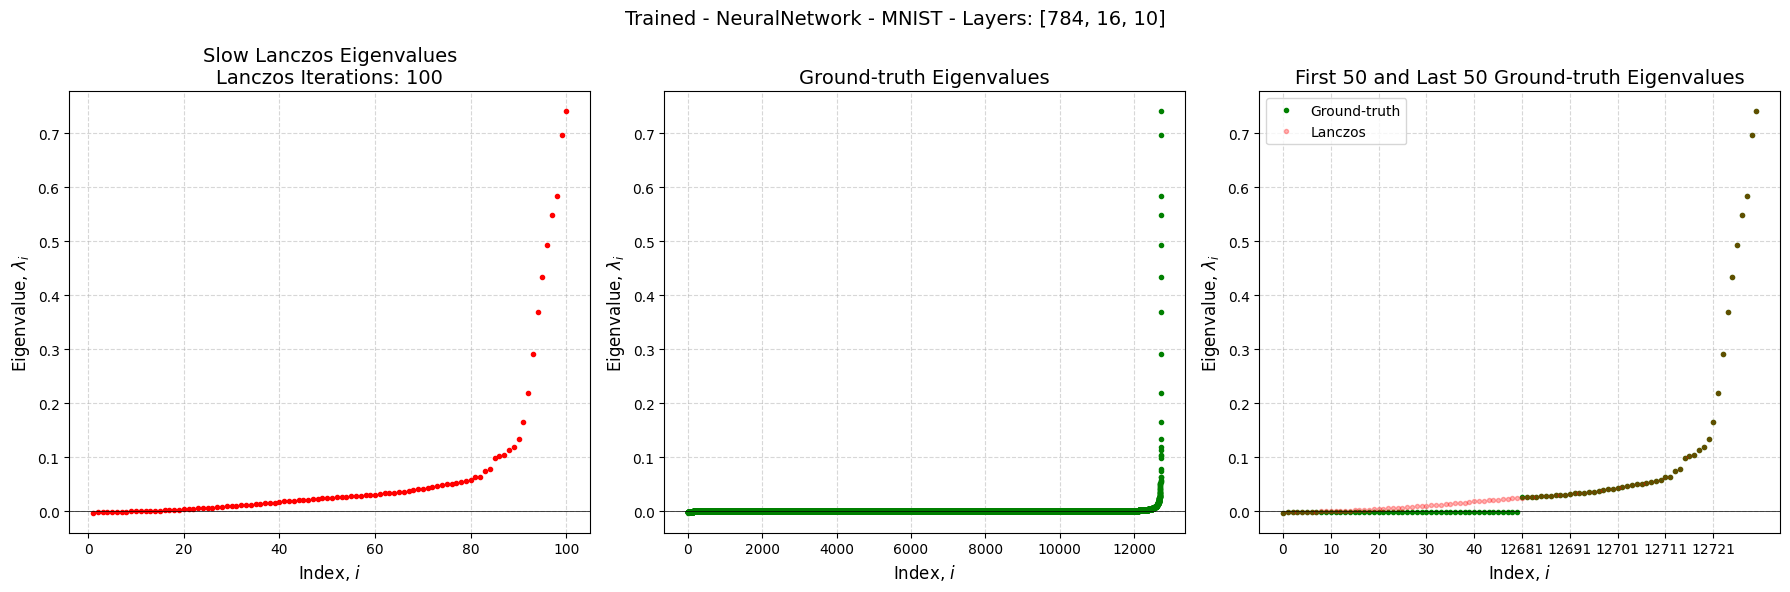

Correctly estimated eigenvalues: 47


In [6]:
EXPERIMENT = "01_NN_MNIST"
MODEL = "trained"
LANCZOS = "slow"
HBS = 60000
ITER = 100

# get the results directory path
results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
print(f"Results directory: {results_dir}")

# load "groundtruth" eigenvalues
gt_eigenvalues = torch.load(f"experiments/{EXPERIMENT}/groundtruth/model_{MODEL}/eigenvalues.pt")

# load the computed eigenvalues
lanczos_eigenvalues = torch.load(os.path.join(results_dir, f"HBS_{HBS}/01_run/eigenvalues_iter_{ITER}.pt"))

# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"

# plot the comparison of the lanczos spectrum and ground-truth spectrum
plot_groundtruth_and_lanczos(lanczos_eigenvalues, gt_eigenvalues, plot_title, LANCZOS, ITER)

# print number of correctly estimated eigenvalues
correct = count_correctly_estimated_eigenvalues(lanczos_eigenvalues, gt_eigenvalues, ITER)
print(f"Correctly estimated eigenvalues: {correct}")

## 2. Dataset: FashionMNIST

### 2.1. Untrained model

Results directory: experiments/01_NN_FashionMNIST/results/untrained/slow


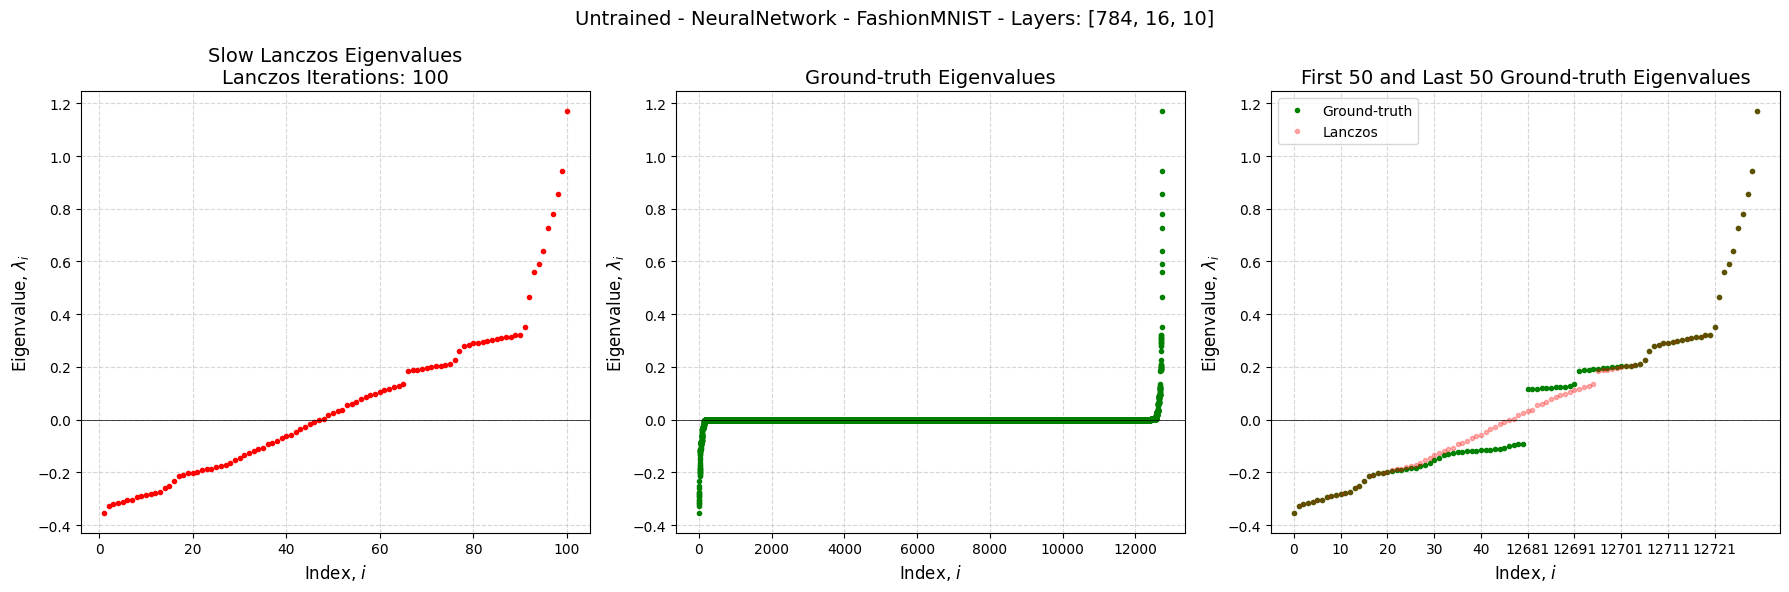

Correctly estimated eigenvalues: 45


In [7]:
EXPERIMENT = "01_NN_FashionMNIST"
MODEL = "untrained"
LANCZOS = "slow"
HBS = 60000 # full Hessian batch size
ITER = 100

# get the results directory path
results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
print(f"Results directory: {results_dir}")

# load "groundtruth" eigenvalues
gt_eigenvalues = torch.load(f"experiments/{EXPERIMENT}/groundtruth/model_{MODEL}/eigenvalues.pt")

# load the computed eigenvalues
lanczos_eigenvalues = torch.load(os.path.join(results_dir, f"HBS_{HBS}/01_run/eigenvalues_iter_{ITER}.pt"))

# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"

# plot the comparison of the lanczos spectrum and ground-truth spectrum
plot_groundtruth_and_lanczos(lanczos_eigenvalues, gt_eigenvalues, plot_title, LANCZOS, ITER)

# print number of correctly estimated eigenvalues
correct = count_correctly_estimated_eigenvalues(lanczos_eigenvalues, gt_eigenvalues, ITER)
print(f"Correctly estimated eigenvalues: {correct}")

### 2.2. Trained model

Results directory: experiments/01_NN_FashionMNIST/results/trained/slow


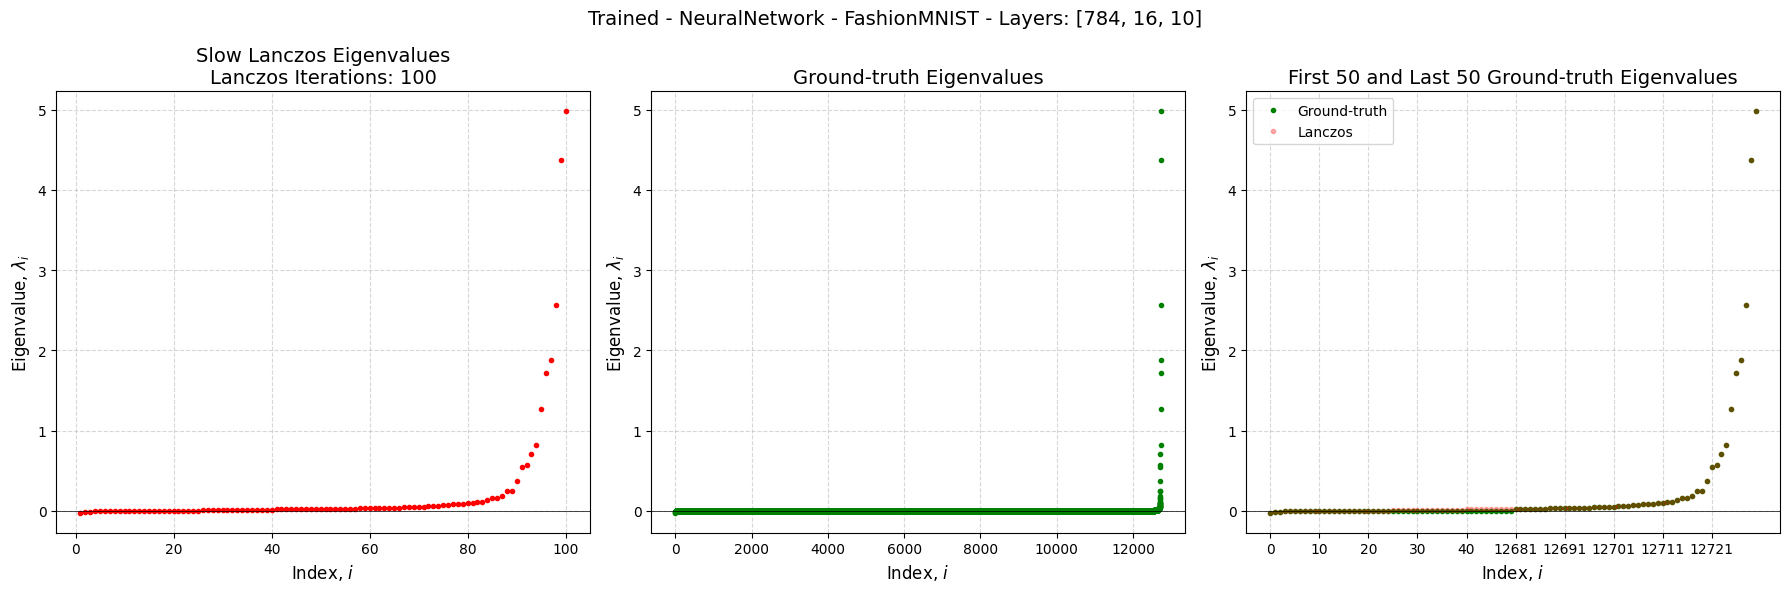

Correctly estimated eigenvalues: 57


In [8]:
EXPERIMENT = "01_NN_FashionMNIST"
MODEL = "trained"
LANCZOS = "slow"
HBS = 60000 # full Hessian batch size
ITER = 100

# get the results directory path
results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
print(f"Results directory: {results_dir}")

# load "groundtruth" eigenvalues
gt_eigenvalues = torch.load(f"experiments/{EXPERIMENT}/groundtruth/model_{MODEL}/eigenvalues.pt")

# load the computed eigenvalues
lanczos_eigenvalues = torch.load(os.path.join(results_dir, f"HBS_{HBS}/01_run/eigenvalues_iter_{ITER}.pt"))

# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"

# plot the comparison of the lanczos spectrum and ground-truth spectrum
plot_groundtruth_and_lanczos(lanczos_eigenvalues, gt_eigenvalues, plot_title, LANCZOS, ITER)

# print number of correctly estimated eigenvalues
correct = count_correctly_estimated_eigenvalues(lanczos_eigenvalues, gt_eigenvalues, ITER)
print(f"Correctly estimated eigenvalues: {correct}")

## 3. Dataset: CIFAR-10

### 3.1. Untrained model

Results directory: experiments/01_NN_CIFAR10/results/untrained/slow


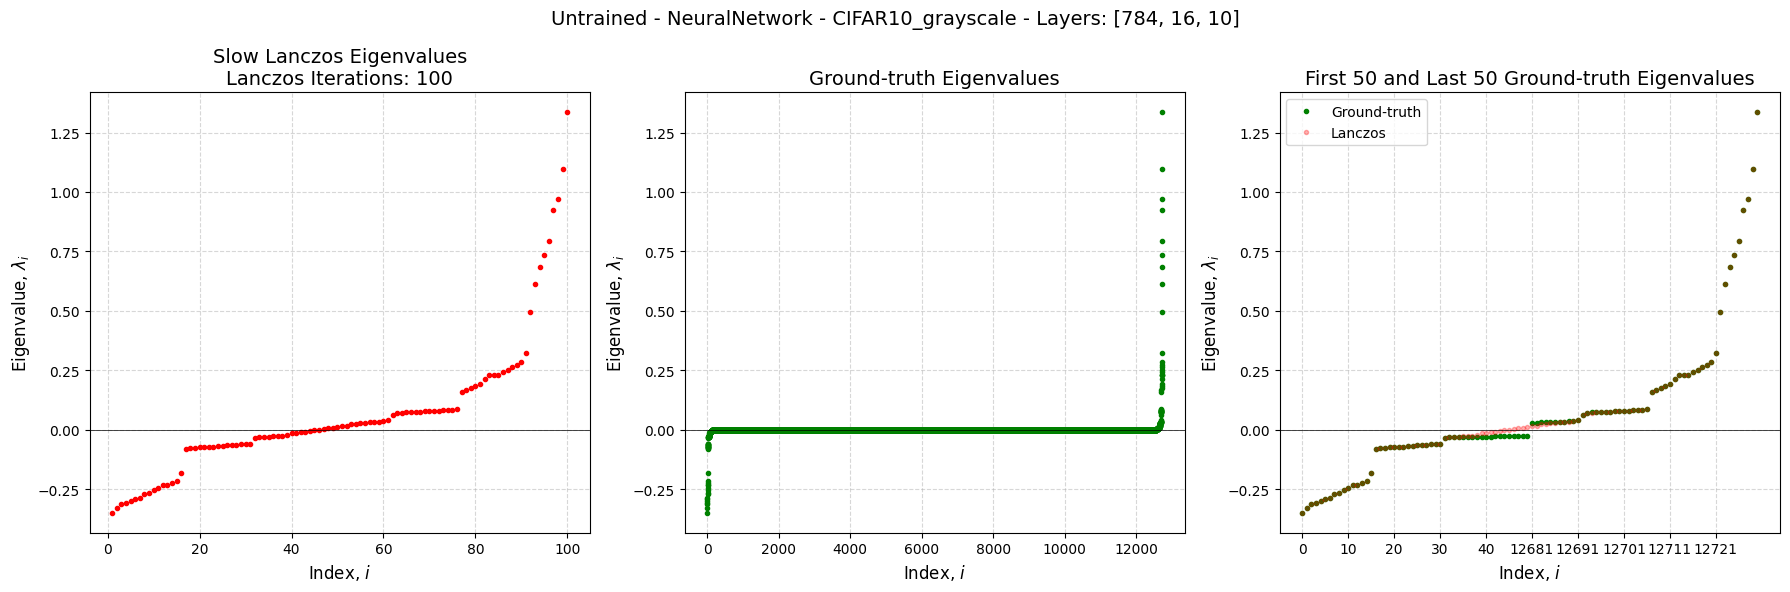

Correctly estimated eigenvalues: 64


In [9]:
EXPERIMENT = "01_NN_CIFAR10"
MODEL = "untrained"
LANCZOS = "slow"
HBS = 50000 # full Hessian batch size
ITER = 100

# get the results directory path
results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
print(f"Results directory: {results_dir}")

# load "groundtruth" eigenvalues
gt_eigenvalues = torch.load(f"experiments/{EXPERIMENT}/groundtruth/model_{MODEL}/eigenvalues.pt")

# load the computed eigenvalues
lanczos_eigenvalues = torch.load(os.path.join(results_dir, f"HBS_{HBS}/01_run/eigenvalues_iter_{ITER}.pt"))

# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"

# plot the comparison of the lanczos spectrum and ground-truth spectrum
plot_groundtruth_and_lanczos(lanczos_eigenvalues, gt_eigenvalues, plot_title, LANCZOS, ITER)

# print number of correctly estimated eigenvalues
correct = count_correctly_estimated_eigenvalues(lanczos_eigenvalues, gt_eigenvalues, ITER)
print(f"Correctly estimated eigenvalues: {correct}")

### 3.2. Trained model

Results directory: experiments/01_NN_CIFAR10/results/trained/slow


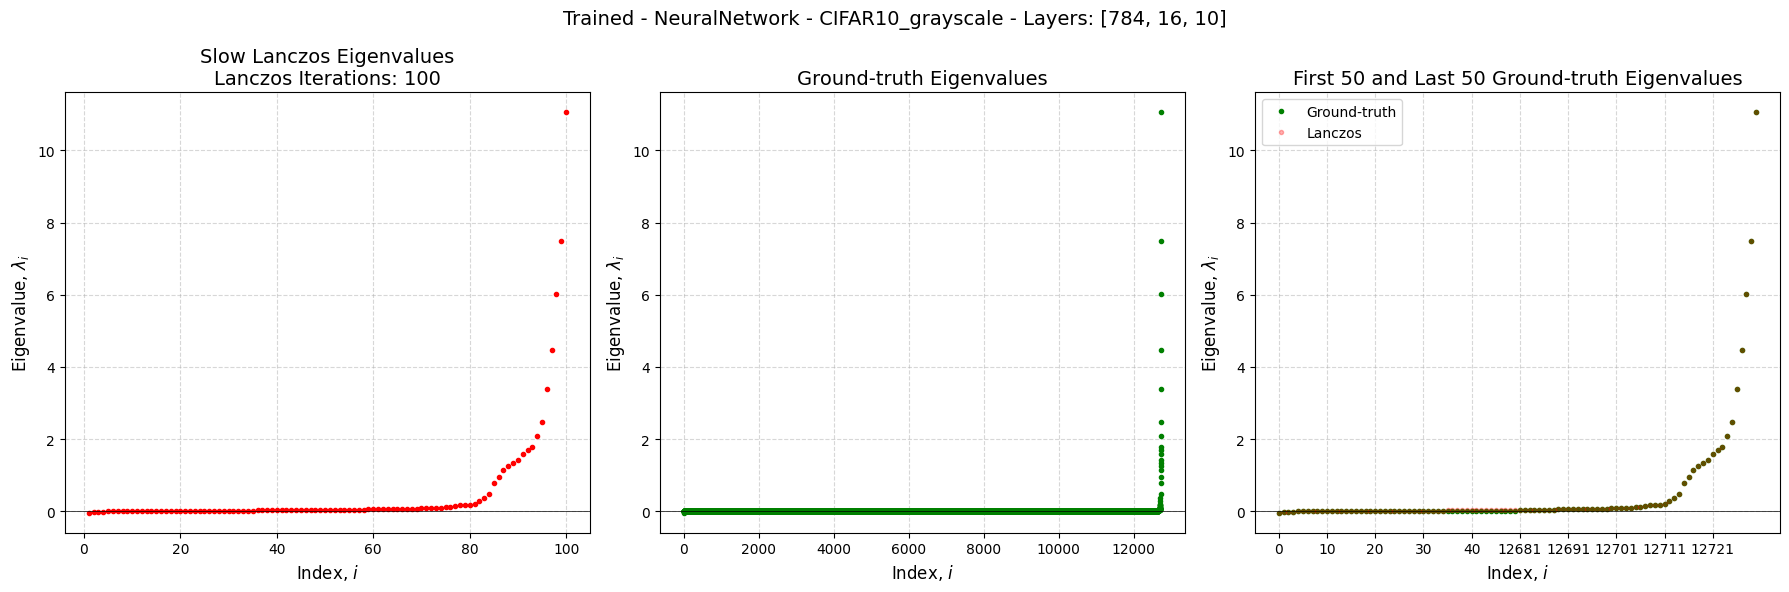

Correctly estimated eigenvalues: 55


In [10]:
EXPERIMENT = "01_NN_CIFAR10"
MODEL = "trained"
LANCZOS = "slow"
HBS = 50000 # full Hessian batch size
ITER = 100

# get the results directory path
results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
print(f"Results directory: {results_dir}")

# load "groundtruth" eigenvalues
gt_eigenvalues = torch.load(f"experiments/{EXPERIMENT}/groundtruth/model_{MODEL}/eigenvalues.pt")

# load the computed eigenvalues
lanczos_eigenvalues = torch.load(os.path.join(results_dir, f"HBS_{HBS}/01_run/eigenvalues_iter_{ITER}.pt"))

# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"

# plot the comparison of the lanczos spectrum and ground-truth spectrum
plot_groundtruth_and_lanczos(lanczos_eigenvalues, gt_eigenvalues, plot_title, LANCZOS, ITER)

# print number of correctly estimated eigenvalues
correct = count_correctly_estimated_eigenvalues(lanczos_eigenvalues, gt_eigenvalues, ITER)
print(f"Correctly estimated eigenvalues: {correct}")